# Machine learning -- Taak

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Get the data from the csv
df = pd.read_csv('data/weblogs.csv')
df.head()
df.columns

Index(['ID', 'NUMBER_OF_REQUESTS', 'TOTAL_DURATION', 'AVERAGE_TIME',
       'STANDARD_DEVIATION', 'REPEATED_REQUESTS', 'HTTP_RESPONSE_2XX',
       'HTTP_RESPONSE_3XX', 'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX',
       'GET_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'OTHER_METHOD', 'NIGHT',
       'UNASSIGNED', 'IMAGES', 'TOTAL_HTML', 'HTML_TO_IMAGE', 'HTML_TO_CSS',
       'HTML_TO_JS', 'WIDTH', 'DEPTH', 'STD_DEPTH', 'CONSECUTIVE', 'DATA',
       'PPI', 'SF_REFERRER', 'SF_FILETYPE', 'MAX_BARRAGE', 'PENALTY', 'ROBOT'],
      dtype='object')

## Data visualisation

## Data interpretation 
A short understanding of each column, written down in a sentence or 2
- <b>ID</b>: Id of the log, not useful
- <b>NUMBER_OF_REQUESTS</b>: The number of requests being pulled while the user was on the website. Useful for detecting robot-behaviour
- <b>TOTAL_DURATION</b>: The total duration of the visit. Useful for detecting robot-behaviour
- <b>AVERAGE_TIME</b>: Average time between requests. useful for detecting robot-behaviour
- <b>STANDARD_DEVIATION</b>: Standard deviation of the time between requests. Useful for detecting robot-behaviour
- <b>REPEATED_REQUESTS</b>: Percentage of repeated requests. Useful for detecting robot-behaviour
- <b>HTTP_RESPONSE_2XX</b>: Percentage of successful requests. Useful for detecting robot-behaviour
- <b>HTTP_RESPONSE_3XX</b>: Percentage of requests that were redirected. Useful for detecting robot-behaviour
- <b>HTTP_RESPONSE_4XX</b>: Percentage of requests that had a client error. Useful for detecting robot-behaviour
- <b>HTTP_RESPONSE_5XX</b>: Percentage of requests that had a server error. Useful for detecting robot-behaviour
- <b>GET_METHOD</b>:  Percentage of requests that used the GET method. Useful for detecting robot-behaviour
- <b>POST_METHOD</b>: Percentage of requests that used the POST method. Useful for detecting robot-behaviour
- <b>HEAD_METHOD</b>: Percentage of requests that used the HEAD method. Useful for detecting robot-behaviour
- <b>OTHER_METHOD</b>: Percentage of requests that used a method other than GET, POST or HEAD. Useful for detecting robot-behaviour
- <b>NIGHT</b>: Percentage of requests that were made between midnight and 7am. Useful for detecting robot-behaviour
- <b>UNASSIGNED</b>: Percentage of requests that had an unknown referer ("-"). Useful for detecting robot-behaviour
- <b>IMAGES</b>: Percentage of image file requests. Useful for detecting robot-behaviour
- <b>TOTAL_HTML</b>: Unknown
- <b>HTML_TO_IMAGE</b>: Unknown
- <b>HTML_TO_CSS</b>: Unknown
- <b>HTML_TO_JS</b>: Unknown
- <b>WIDTH</b>: width of the traveled "tree" in url space. Useful for detecting robot-behaviour 
- <b>DEPTH</b>: depth of the traveled "tree" in url space. Useful for detecting robot-behaviour
- <b>STD_DEPTH</b>: Standard deviation of the depth of the traveled "tree" in url space. Useful for detecting robot-behaviour
- <b>CONSECUTIVE</b>: Percentage of consecutive requests. Useful for detecting robot-behaviour
- <b>DATA</b>: Total transfered data in bytes. Useful for detecting robot-behaviour
- <b>PPI</b>: Popularity Index. Average popularity index of each page found in the session. Useful for detecting robot-behaviour
- <b>SF_REFERRER</b>: Switching factor on unassigned referer field. Useful for detecting robot-behaviour
- <b>SF_FILETYPE</b>: Switching factor on file type. Useful for detecting robot-behaviour
- <b>MAX_BARRAGE</b>: Maximum number of embedded resources in a single page. Useful for detecting robot-behaviour
- <b>PENALTY</b>: Penalty for each backward and vorward navigation or loop. Useful for detecting robot-behaviour
- <b>ROBOT</b>: 1 if the user is a robot, 0 if the user is a human


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non-null  float64
 14  NIGHT               67352 non-null  float64
 15  UNASSIGNED          67352 non-null  float64
 16  IMAG

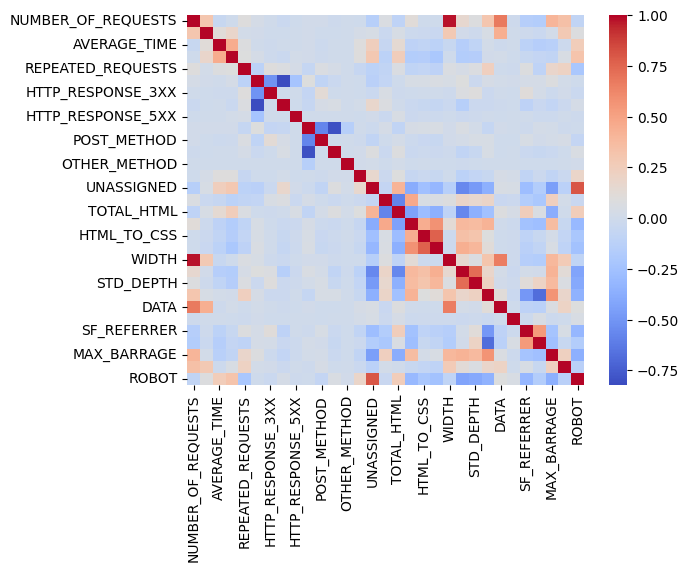

In [4]:
print(df.info())
corr = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')

# Display the plot
plt.show()

## Select data 

In [5]:
# Perform a value count on the robot column
df['ROBOT'].value_counts()
# There are a lot more non-robots than robots
# Filter the dataframe so the distribution is more even
dfNonRobot = df[df['ROBOT'] == 0]
dfRobot = df[df['ROBOT'] == 1]
# Randomize both dataframes
dfNonRobot = dfNonRobot.sample(frac=1)
dfRobot = dfRobot.sample(frac=1)
dfNonRobot = dfNonRobot[:len(dfRobot.index)]
dfRobot = dfRobot[:len(dfNonRobot.index)]
df = pd.concat([dfNonRobot, dfRobot], ignore_index=True)
df['ROBOT'].value_counts()

0    13494
1    13494
Name: ROBOT, dtype: int64

<Axes: >

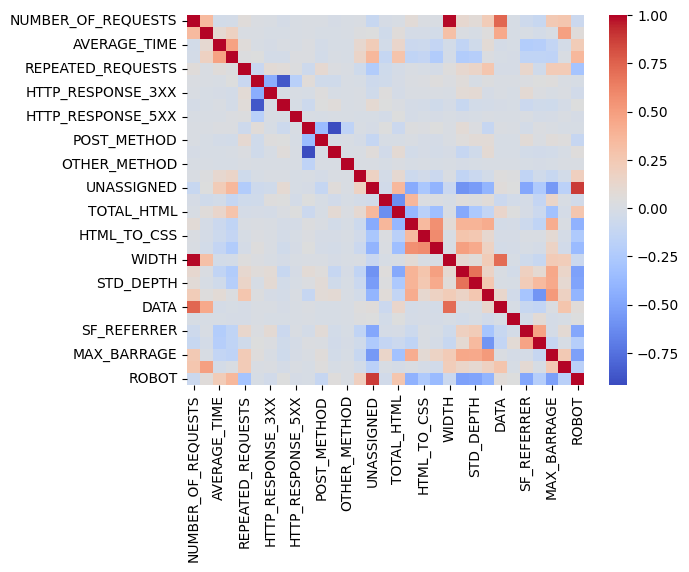

In [6]:
# Use the correlation matrix to find the most correlated features
corr = df.corr(numeric_only=True)
corr['ROBOT'].sort_values(ascending=False)

# Plot the heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')

In [7]:

# Currently use all feaztures with exception of the ROBOT & ID columns
features = df.columns.drop(['ROBOT', 'ID'])
x = df[features]
y = df['ROBOT']

# Replace NaN values with 0
x = x.fillna(0)

In [8]:
# Analyze the x-data
print(x.describe())
print(x.info())

# Normalize all the columns that are not binary
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# Print the amount of nan values in the training data

       NUMBER_OF_REQUESTS  TOTAL_DURATION  AVERAGE_TIME  STANDARD_DEVIATION  \
count        26988.000000    2.698800e+04  26988.000000        26988.000000   
mean            48.186898    1.183063e+03     62.416334           38.692103   
std            219.748968    1.262958e+04    211.697802          102.842727   
min              1.000000    0.000000e+00      0.000000            0.000000   
25%              1.000000    0.000000e+00      0.000000            0.000000   
50%              4.000000    6.000000e+00      0.700000            0.433013   
75%             39.000000    3.140000e+02      7.036551           13.850621   
max          15265.000000    1.168297e+06   1800.000000          893.500000   

       REPEATED_REQUESTS  HTTP_RESPONSE_2XX  HTTP_RESPONSE_3XX  \
count       26988.000000       26988.000000       26988.000000   
mean            0.029266           0.979935           0.006478   
std             0.072019           0.118347           0.053826   
min             0.000000

## Choice of model

- Classes: 2, 0 = human, 1 = robot
- Model has to be binary & able to handle a lot of features
- Choices:
    - Mini-batch Gradient Descent
    - Logistic Regression
    - Support Vector Machine
    - Random Forest
    - Decision Tree

In [9]:
## Training the model using mini-batch gradient descent
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy:  0.9440533530937384
Confusion matrix:  [[1238   98]
 [  53 1310]]
Classification report:                precision    recall  f1-score   support

           0       0.96      0.93      0.94      1336
           1       0.93      0.96      0.95      1363

    accuracy                           0.94      2699
   macro avg       0.94      0.94      0.94      2699
weighted avg       0.94      0.94      0.94      2699



# Conclusions
This is good, but let's try to improve it by removing certain features

[4.73961953e-03 6.81724423e-03 1.24889717e-02 7.30195560e-03
 2.30660008e-02 3.60780226e-03 1.01680522e-03 4.96572764e-03
 1.36743077e-04 2.18002374e-03 1.49388027e-03 1.23641924e-03
 3.20460398e-05 9.74770794e-03 4.91877211e-01 4.97667419e-02
 3.94475068e-02 1.25729533e-02 8.03010377e-03 1.24745647e-02
 6.74683201e-03 4.54052305e-02 3.30398518e-02 2.34512890e-02
 5.19332529e-02 5.75125083e-04 7.32937242e-02 5.40237335e-02
 1.34257178e-02 5.10521434e-03]


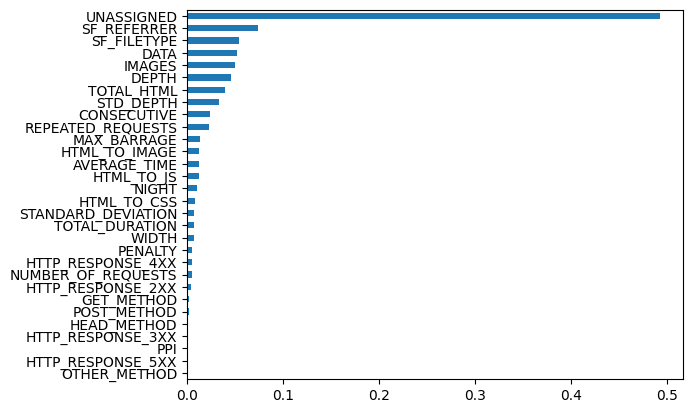

In [10]:
# Use sklearn to find the feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.sort_values(inplace=False).plot(kind='barh')
plt.show()



In [11]:
# Remove the least important features
features = [
    "UNASSIGNED",
    "SF_REFERRER",
    "SF_FILETYPE",
    "DEPTH",
    "IMAGES",
    "DATA",
    "CONSECUTIVE",
    "TOTAL_HTML",
    "STD_DEPTH",
    "REPEATED_REQUESTS",
    "HTML_TO_IMAGE",
    "HTML_TO_CSS",
    "AVERAGE_TIME",
    "HTML_TO_JS",
    "MAX_BARRAGE",
    "STANDARD_DEVIATION",
    "NIGHT",
    "NUMBER_OF_REQUESTS",
    "TOTAL_DURATION",
    "WIDTH"
]

# Use the new features
x = df[features]
y = df['ROBOT']

# Replace NaN values with 0
x = x.fillna(0)

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

y_train.shape, x_train.shape

((24289,), (24289, 20))

In [12]:
# Retrain the model
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy:  0.9447943682845499
Confusion matrix:  [[1241   95]
 [  54 1309]]
Classification report:                precision    recall  f1-score   support

           0       0.96      0.93      0.94      1336
           1       0.93      0.96      0.95      1363

    accuracy                           0.94      2699
   macro avg       0.95      0.94      0.94      2699
weighted avg       0.95      0.94      0.94      2699



# Conclusion
Feature selection didn't have a big impact, so up next will be training the model

c:\Users\Maarten Boon\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[Text(0, 0, '0.973694'),
 Text(0, 0, '0.968877'),
 Text(0, 0, '0.965913'),
 Text(0, 0, '0.954057'),
 Text(0, 0, '0.950722'),
 Text(0, 0, '0.945165')]

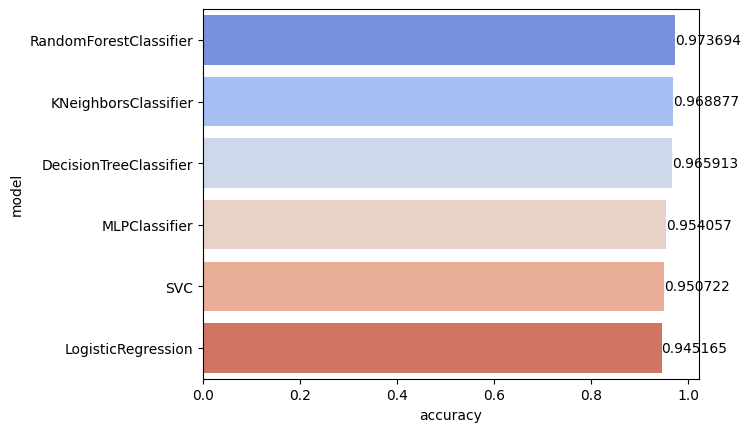

In [13]:
# Train different algorithms and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier()
]

results = {
    'model': [],
    'accuracy': []
}

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results['model'].append(model.__class__.__name__)
    results['accuracy'].append(accuracy_score(y_test, y_pred))

results = pd.DataFrame(results)
# Sort the results
results = results.sort_values(by='accuracy', ascending=False)
# Plot the results
ax = sns.barplot(x='accuracy', y='model', data=results, palette='coolwarm', orient='h')
ax.bar_label(ax.containers[0])

In [14]:
# Use the best model to predict the test data
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9740644683216005

# Attempt at voting classifier

In [16]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples with the model name and the model
estimators = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('mlp', MLPClassifier(max_iter=1000))
]

# Create the voting classifier
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

accuracy_score(y_test, y_pred)

0.9681363467951093